# Insurance Purchase Prediction Using Deep Neural Network

In [58]:
import os
import pandas as pd
os.chdir(r"C:/My Courses/MATH 5671 - Financial Data Mining and Big Data Analytics/Fall 18/assignments/assignment06/")
insurance_df = pd.read_csv("insurance.csv",header =0)
insurance_df.head()

,CUSTOMER_ID,LAST,FIRST,STATE,REGION,SEX,PROFESSION,AGE,HAS_CHILDREN,SALARY,...,MORTGAGE_AMOUNT,N_TRANS_ATM,N_MORTGAGES,N_TRANS_TELLER,CREDIT_CARD_LIMITS,N_TRANS_KIOSK,N_TRANS_WEB_BANK,LTV,LTV_BIN,BUY_INSURANCE
0,CU8589,KALA,IVERSON,WI,Midwest,F,PROF-9,49,1,68696,...,5500,2,1,5,800,1,3700,25574.00,HIGH,No
1,CU9823,NESTOR,HORTON,CA,West,M,Nurse,24,0,73850,...,0,0,0,0,1500,1,0,21862.50,MEDIUM,No
2,CU12175,DWIGHT,ROLLINS,MI,Midwest,M,Programmer/Developer,26,1,60249,...,1036,4,1,2,1000,4,1036,19662.25,MEDIUM,No
3,CU7924,GRADY,STATON,NY,NorthEast,M,Programmer/Developer,32,0,60466,...,0,3,0,2,700,3,0,16816.50,MEDIUM,No
4,CU14284,DOMINICK,LAW,NY,NorthEast,M,Construction Laborer,24,0,76570,...,358,0,1,0,1500,1,358,27042.50,HIGH,No


## Data Exploration
Exploring the dataset using plots, histograms, descriptive statistics, etc.

In [59]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# target variable distribution
insurance_df.groupby(['BUY_INSURANCE'])[['BUY_INSURANCE']].count()

,BUY_INSURANCE
BUY_INSURANCE,
No,742
Yes,273


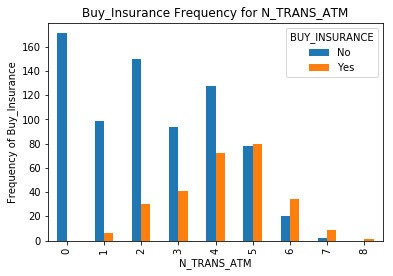

In [19]:
# cross tabulation of N_TRANS_ATM and BUY_INSURANCE (Target variable).
pd.crosstab(insurance_df.N_TRANS_ATM,insurance_df.BUY_INSURANCE).plot(kind='bar')
plt.title('Buy_Insurance Frequency for N_TRANS_ATM')
plt.xlabel('N_TRANS_ATM')
plt.ylabel('Frequency of Buy_Insurance')
plt.show()

We can see that customers with higher N_TRANS_ATM are more likely to buy.

## Preprocessing
Convert a number of categorical variables to dummy variables

In [60]:
# convert categorical variables to dummy variables
cat_vars=['STATE','REGION','SEX','PROFESSION','MARITAL_STATUS']
# cat_vars=['state','region','sex','profession','marital_status']
for var in cat_vars:
    # cat_list='var' + '_' + var
    cat_list = pd.get_dummies(insurance_df[var], prefix=var)
    insurance_df=pd.concat([insurance_df,cat_list],axis = 1) # concat horizontally with newly dummy features
    

Also change Yes/No to 1/0 in the target variable

In [69]:
insurance_df[insurance_df['BUY_INSURANCE'] == 'Yes'] = 1
insurance_df[insurance_df['BUY_INSURANCE'] == 'No'] = 0
insurance_df[['BUY_INSURANCE']].head()

,BUY_INSURANCE
0,0
1,0
2,0
3,0
4,0


In [70]:
insurance_df.head()
#cat_list.head()

,CUSTOMER_ID,LAST,FIRST,STATE,REGION,SEX,PROFESSION,AGE,HAS_CHILDREN,SALARY,...,PROFESSION_Software Engineer,PROFESSION_Technical Writer,PROFESSION_Truck Driver,PROFESSION_Veterinarian,PROFESSION_Waiter/Waitress,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_OTHER,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# remove the original categorical variables
data_vars=insurance_df.columns.values.tolist()
selected_columns = list(set(data_vars).difference(set(cat_vars)))
np.array(selected_columns)

# now only get variables after converting to dummy variables
data = insurance_df[selected_columns]
data.head()

,STATE_TX,PROFESSION_PROF-55,N_OF_DEPENDENTS,PROFESSION_Professor,PROFESSION_Dentist,STATE_OH,PROFESSION_PROF-31,PROFESSION_PROF-15,STATE_LA,PROFESSION_Fireman,...,STATE_FL,PROFESSION_PROF-52,LTV,PROFESSION_Truck Driver,PROFESSION_Law Enforcement Officer,STATE_DC,PROFESSION_PROF-19,PROFESSION_PROF-39,STATE_MO,PROFESSION_PROF-11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0


In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = data[data.columns.difference(['CUSTOMER_ID','LAST','FIRST','BUY_INSURANCE','LTV_BIN'])]
y = data[['BUY_INSURANCE']]

In [73]:
X.head()

,AGE,BANK_FUNDS,CAR_OWNERSHIP,CHECKING_AMOUNT,CREDIT_BALANCE,CREDIT_CARD_LIMITS,HAS_CHILDREN,HOUSE_OWNERSHIP,LTV,MARITAL_STATUS_DIVORCED,...,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_TX,STATE_UT,STATE_WA,STATE_WI,TIME_AS_CUSTOMER,T_AMOUNT_AUTOM_PAYMENTS
0,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y.head()

,BUY_INSURANCE
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
XX = scaler.fit_transform(X)

This is an unbalance data set so we use SMOTE to over-sample the data set. Training result would be better.

In [80]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=0)
X_train_os,y_train_os=os.fit_sample(X_train, y_train.BUY_INSURANCE.values.tolist())
X_train_os = pd.DataFrame(data=X_train_os,columns=X.columns )
y_train_os= pd.DataFrame(data=y_train_os,columns=['BUY_INSURANCE'])

In [81]:
y_train.head()

,BUY_INSURANCE
68,0
757,1
867,1
936,1
258,0


Now the class distribution is balanced

In [82]:
y_train_os.groupby(['BUY_INSURANCE'])[['BUY_INSURANCE']].count()

,BUY_INSURANCE
BUY_INSURANCE,
0,529
1,529


## Model

In [88]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(1000, 100), random_state=1)
clf.fit(X_train_os, y_train_os.BUY_INSURANCE.values.tolist()) 
pred = clf.predict(X_test)
print('Accuracy of Deep NN classifier on test set: {:.2f}%'.format(clf.score(X_test, y_test.BUY_INSURANCE.values.tolist()) * 100))

Accuracy of Deep NN classifier on test set: 100.00%


In [91]:
X_train_os.shape[1]

150

Now try a simple deep learning model using keras. The first layer has 100 neurons and expects 150 input variables (in X_train_os.shape[1]). The hidden layer has 100 neurons and the output layer has 1 neuron to predict the class label.

In [89]:
import numpy as np
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Lambda
from keras.layers import MaxPooling2D, Dropout
from keras.utils import print_summary
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pickle
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(100, input_dim=X_train_os.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_os.values, y_train_os.BUY_INSURANCE.values, epochs=150, batch_size=10)

Epoch 1/150
1058/1058 [==============================] - 1s 526us/step - loss: 0.2886 - acc: 0.9792
Epoch 2/150
1058/1058 [==============================] - 0s 170us/step - loss: 0.0628 - acc: 1.0000
Epoch 3/150
1058/1058 [==============================] - 0s 179us/step - loss: 0.0089 - acc: 1.0000
Epoch 4/150
1058/1058 [==============================] - 0s 176us/step - loss: 0.0033 - acc: 1.0000
Epoch 5/150
1058/1058 [==============================] - 0s 176us/step - loss: 0.0017 - acc: 1.0000
Epoch 6/150
1058/1058 [==============================] - 0s 180us/step - loss: 0.0011 - acc: 1.0000
Epoch 7/150
1058/1058 [==============================] - 0s 285us/step - loss: 7.1931e-04 - acc: 1.0000
Epoch 8/150
1058/1058 [==============================] - 0s 289us/step - loss: 5.2007e-04 - acc: 1.0000
Epoch 9/150
1058/1058 [==============================] - 0s 209us/step - loss: 3.9295e-04 - acc: 1.0000
Epoch 10/150
1058/1058 [==============================] - 0s 213us/step - loss: 3.0666e-

Now evaluate the model

In [90]:
scores = model.evaluate(X_test, y_test.BUY_INSURANCE.values)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

305/305 [==============================] - 0s 308us/step

acc: 100.00%


Starting here write your own neural network code to classify insurance purchases using test data, compute the accuracy, confusion matrix, precision, recall. Start with writing individual functions, then the main code that calls the functions above to train a model using the training data and return theta, then test the model using the test data, compute accuracy, confusion matrix, precision, recall

In [92]:
import csv
import numpy as np
import math

# Should use the same training/test datasets above: X_train_os, y_train_os, X_test_os, y_test_os

# function that normalizes each predictor
def normalize(X):
    # Write your code here
    
    
    return Xnorm

# function that return sigmoid of z
def sigmoid(z):
    # Write your code here
    
    
    return g

def gradient(z):
    # Write your code here
    
    
    return g

# cost function
def computeCost(theta, shape, X, y, lamba):
    # Write your code here
    
    
    
    return J

# cost function
def computeGrad(theta, shape, X, y, lamba):
    # Write your code here
    
    

    return grad

def predict(theta, shape, X):
    # Write your code here
        
        
    return pred


def optimize(theta,shape,X,y,maxiter,lamba):
    # Write your code here
    
    
    return theta

## Additional Model Scoring

Use your model to score the test dataset in the Insurance Purchase Prediction contest below. After joining the contest, you can create a team and invite members. Submit your score result to see how it is ranked, and share your write-up in the article section

http://www.scriptedin.com/contests/view/6

(The test dataset here doesn’t have CUSTOMER_ID, LAST, FIRST but the rest is the same. You need to convert categorical variables to dummy variables). You can re-train the model using the training dataset as well if you’d like.
